Unique companies present in companies.txt :  66368
unique companies present in rounds2.csv :  66368

There are no companies in the rounds2 file which are not present in companies

number of obeservation in master frame: 91467

Mean of raised_amount_usd for funding venture:  11026817.672607334
Mean of raised_amount_usd for funding seed:  748881.3085999211
Mean of raised_amount_usd for funding angel:  992696.7350343474
Mean of raised_amount_usd for funding private equity:  72356974.02591923

Best Investment type suitable for Spark Funds : venture

In USA -  Total number of investment  10863096.0  and Total amount 70971601772.0
In GBR -  Total number of investment  35475.0  and Total amount 4003418592.0
In IND -  Total number of investment  10446.0  and Total amount 2137917552.0

based on count of investments
In USA - Top Sector :-  Others - Number of investment :- 2135.0 
 Second best Sector :-  Cleantech / Semiconductors - Number of investment :- 1512.0 
 Third best Sector  :-  Social, 

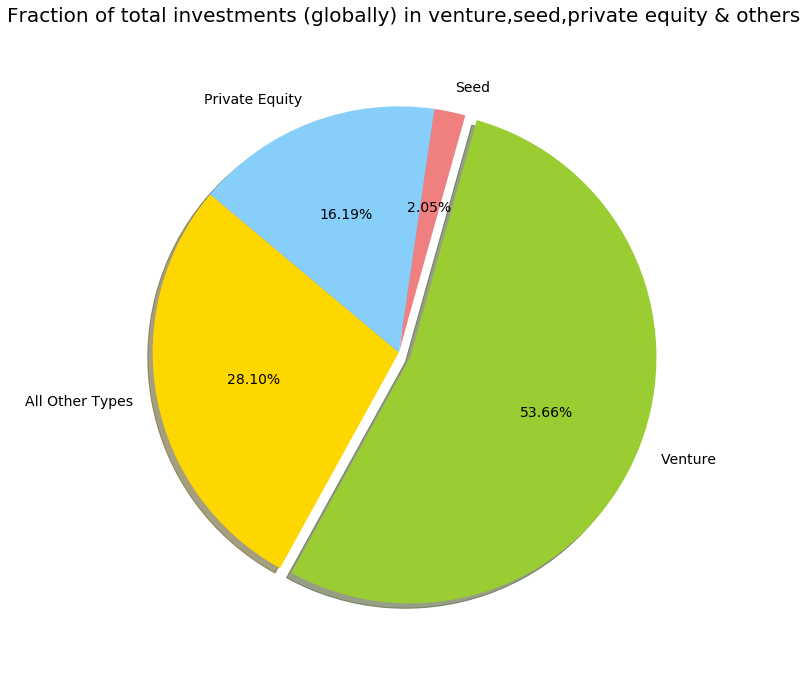

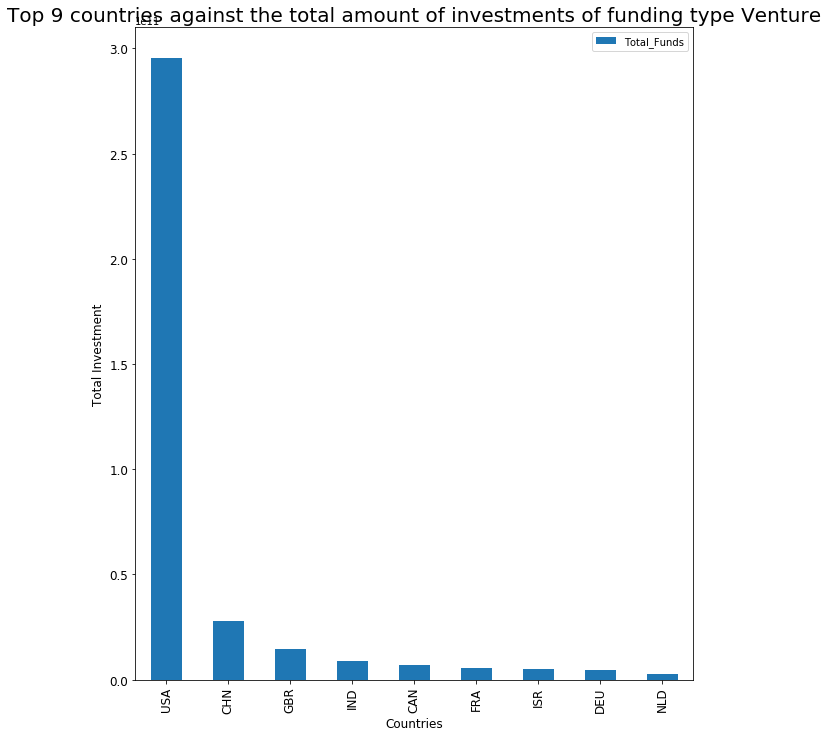

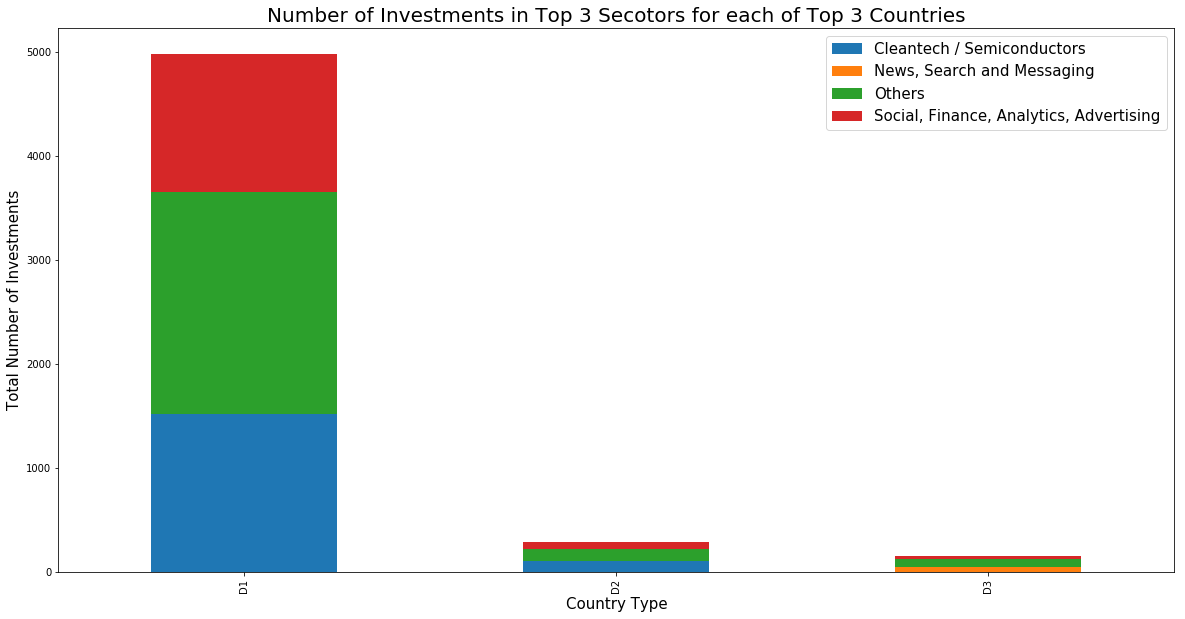

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

    
#converting in dataframe
df_companies = pd.read_csv("companies.txt",engine='python',sep="\t")
df_rounds= pd.read_csv("rounds2.csv",engine='python',sep=",")

#finding the unique company names
unique_companies_in_companies = df_companies['permalink'].str.lower().nunique()
unique_companies_in_rounds = df_rounds['company_permalink'].str.lower().nunique()

#printing the unique companies present in Companies and Rounds2 file
print("Unique companies present in companies.txt : " ,unique_companies_in_companies)
print("unique companies present in rounds2.csv : " ,unique_companies_in_rounds)


sum_of_companies  = df_companies['permalink'].str.lower() + df_rounds['company_permalink'].str.lower()
number_of_rows_rounds = df_rounds.shape[0]

#checking if there is any companies which are not present in round2 file
if sum_of_companies.count == number_of_rows_rounds:
    print('\nThere are companies in the rounds2 file which are not present in companies')
else:
    print('\nThere are no companies in the rounds2 file which are not present in companies')
    
    
#cleaning duplicates permalink from companies dataframe
df_companies_clean = df_companies.drop_duplicates(["permalink"]).reset_index(drop=True)

#As found in the comapnies file , that based on the status companies names are getting duplicated
df_companies_clean_copy= df_companies_clean.loc[df_companies_clean['status'] != "closed"].copy()

#cleaning duplicates company_permalink from rounds dataframe
df_rounds_clean = df_rounds.drop_duplicates(["company_permalink","funding_round_type"]).reset_index(drop=True)

#lowering and whitesace trimming doen on company_permalink and permalink column
df_rounds_clean["company_permalink"] = df_rounds_clean[["company_permalink"]].apply(lambda x: x.str.strip())

df_companies_clean_copy[["permalink"]] = df_companies_clean_copy[["permalink"]].apply(lambda x: x.str.strip())

df_rounds_clean[["company_permalink"]] = df_rounds_clean[["company_permalink"]].apply(lambda x: x.str.lower())

df_companies_clean_copy[["permalink"]] = df_companies_clean_copy[["permalink"]].apply(lambda x: x.str.lower())

df_companies_clean_copy=df_companies_clean_copy.rename(columns = {'permalink':'company_permalink'})

#merging data with rounds
master_frame = pd.merge(df_rounds_clean, df_companies_clean_copy, on='company_permalink')

master_frame.dropna(how='all')

#print(master_frame)

print("\nnumber of obeservation in master frame:" ,master_frame.shape[0])


#check point 2
#Calculate the average investment amount for each of the four funding types (venture, angel, seed, 
#and private equity)
#Based on the average investment amount calculated above, which investment type do you think is 
#the most suitable for Spark Funds?

#Find the mean of raised_amoun_usd  for funding_round_type venture,angel,seed,private_equity
average_venture = master_frame.loc[master_frame['funding_round_type'] == "venture",'raised_amount_usd'].mean()
average_angel = master_frame.loc[master_frame['funding_round_type'] == "angel",'raised_amount_usd'].mean()
average_seed = master_frame.loc[master_frame['funding_round_type'] == "seed",'raised_amount_usd'].mean()
average_private_equity = master_frame.loc[master_frame['funding_round_type'] == "private_equity",'raised_amount_usd'].mean()


print("\nMean of raised_amount_usd for funding venture: " ,average_venture)
print("Mean of raised_amount_usd for funding seed: " ,average_seed)
print("Mean of raised_amount_usd for funding angel: " ,average_angel)
print("Mean of raised_amount_usd for funding private equity: " ,average_private_equity)


#Based on the most representative investment amount calculated above,
#which investment type do you think is the most suitable for Spark Funds?

most_frequent_country_code = master_frame['country_code'].value_counts().idxmax()
master_frame['country_code'].fillna(most_frequent_country_code, inplace=True)
#master_frame['country_code'].isnull().sum() now its 0 so no NA value
df_avg_fund_type = master_frame.groupby('funding_round_type', as_index=False).agg({"raised_amount_usd": "mean"})

df_avg_fund_type.columns = ['funding_round_type', 'avg_raised_amount_usd']

df_best_fund_type = df_avg_fund_type[(df_avg_fund_type.avg_raised_amount_usd >= 5000000) & (df_avg_fund_type.avg_raised_amount_usd  <= 15000000)]

df_best_fund_type = df_best_fund_type.sort_values(['avg_raised_amount_usd'], ascending=[False])
df_best_fund_type = df_best_fund_type.iloc[0]              

print("\nBest Investment type suitable for Spark Funds :" , df_best_fund_type.funding_round_type)


#check point 3
#taking subset of master_frame where fund type is the best fund type
master_frame_best_fund_type = master_frame.loc[master_frame["funding_round_type"] == df_best_fund_type.funding_round_type]
#suming up investment for each country and renaming the columns
country_wise_sum_funds = master_frame_best_fund_type.groupby('country_code', as_index=False).agg({"raised_amount_usd": "sum"})

country_wise_sum_funds.columns = ['Country_Code', 'Total_Funds']

#sortin the countries based in the investments
country_wise_sum_funds = country_wise_sum_funds.sort_values(['Total_Funds'], ascending=[False])

#Check point 3: - Top9 dataframe 
top9 = country_wise_sum_funds.head(9)

#check point 4 - Sector Analysis
df_mapping = pd.read_csv("mapping.csv")   

#making main sector column on based on which column has 1 in it 
df_mapping['main_sector'] = df_mapping.iloc[:,1:].dot(df_mapping.columns[1:])    
df_mapping = df_mapping[['category_list','main_sector']]
#now my mapping dataframe has two columns primary sector and main_sector
df_mapping.columns = ['primary_sector', 'main_sector']

#extracting the firt value as x from format like this  x|y|z 
master_frame["primary_sector"] = master_frame.category_list.str.extract(r'(.*?)(?:\||$)')

#merge done with master frame 
master_frame_mapped_sector = pd.merge(master_frame, df_mapping, on='primary_sector')



#check point 5 - Sector Analysis 2

venture_master_frame = master_frame_mapped_sector.loc[master_frame_mapped_sector["funding_round_type"] == df_best_fund_type.funding_round_type]

venture_master_frame_within_limits =  venture_master_frame[(venture_master_frame.raised_amount_usd >= 5000000) & (venture_master_frame.raised_amount_usd  <= 15000000)]


# data frame for USA
D1 = venture_master_frame_within_limits[(venture_master_frame_within_limits.country_code == "USA")]
# data frame for GBR
D2 = venture_master_frame_within_limits[(venture_master_frame_within_limits.country_code == "GBR")]
# data frame for IND
D3 = venture_master_frame_within_limits[(venture_master_frame_within_limits.country_code == "IND")]

def countAndSumOfInvestments(x):
    values = {
        'total_number_of_investments': x['raised_amount_usd'].count(),
        'total_amount_of_investments': x['raised_amount_usd'].sum()}
    return pd.Series(values, index=['total_number_of_investments', 'total_amount_of_investments'])

#preparing USA Data
D1_sectored = D1.groupby('main_sector').apply(countAndSumOfInvestments)
D1_sectored.reset_index(inplace=True)

D1 = pd.merge(D1, D1_sectored, on='main_sector')

#preparing GBR Data
D2_sectored = D2.groupby('main_sector').apply(countAndSumOfInvestments)
D2_sectored.reset_index(inplace=True)
D2 = pd.merge(D2, D2_sectored, on='main_sector')

#preparing ID Data
D3_sectored = D3.groupby('main_sector').apply(countAndSumOfInvestments)
D3_sectored.reset_index(inplace=True)
D3 = pd.merge(D3, D3_sectored, on='main_sector')


# grand total investment made in each of 3 the countries
print("\nIn USA -  Total number of investment ",D1.total_number_of_investments.sum(),\
      " and Total amount" , D1.raised_amount_usd.sum() )
print("In GBR -  Total number of investment ",D2.total_number_of_investments.sum(),\
      " and Total amount" , D2.raised_amount_usd.sum() )
print("In IND -  Total number of investment ",D3.total_number_of_investments.sum(),\
      " and Total amount" , D3.raised_amount_usd.sum() )


#taking top 3 of each country as per investment count
D1_sectors_top3 = D1_sectored.sort_values(['total_number_of_investments'], ascending=[False]).head(3)
D2_sectors_top3 = D2_sectored.sort_values(['total_number_of_investments'], ascending=[False]).head(3)
D3_sectors_top3 = D3_sectored.sort_values(['total_number_of_investments'], ascending=[False]).head(3)

print("\nbased on count of investments")
print("In USA - Top Sector :- ",D1_sectors_top3['main_sector'].iloc[0] ,\
      "- Number of investment :-" , D1_sectors_top3["total_number_of_investments"].iloc[0] ,\
      "\n Second best Sector :- " , D1_sectors_top3['main_sector'].iloc[1],\
      "- Number of investment :-" , D1_sectors_top3["total_number_of_investments"].iloc[1] ,\
      "\n Third best Sector  :- " , D1_sectors_top3['main_sector'].iloc[2] ,\
      "- Number of investment :-" , D1_sectors_top3["total_number_of_investments"].iloc[2])

print("In GBR - Top Sector :- ",D2_sectors_top3['main_sector'].iloc[0] ,\
       "- Number of investment :-" , D2_sectors_top3["total_number_of_investments"].iloc[0] ,\
      "\n Second best Sector :- " , D2_sectors_top3['main_sector'].iloc[1],\
       "- Number of investment :-" , D2_sectors_top3["total_number_of_investments"].iloc[1] ,\
      "\n Third best Sector  :- " , D2_sectors_top3['main_sector'].iloc[2],\
       "- Number of investment :-" , D2_sectors_top3["total_number_of_investments"].iloc[2])

print("In IND - Top Sector :- ",D3_sectors_top3['main_sector'].iloc[0] ,\
       "- Number of investment :-" , D3_sectors_top3["total_number_of_investments"].iloc[0] ,\
      "\n Second best Sector :- " , D3_sectors_top3['main_sector'].iloc[1],\
       "- Number of investment :-" , D3_sectors_top3["total_number_of_investments"].iloc[1] ,\
      "\n Third best Sector  :- " , D3_sectors_top3['main_sector'].iloc[2],\
       "- Number of investment :-" , D3_sectors_top3["total_number_of_investments"].iloc[2])


#1st company in D1
D1_1st_company = D1[D1.main_sector == D1_sectors_top3['main_sector'].iloc[0]].\
                    groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(1)


#2nd company in D1
D1_2nd_company = D1[D1.main_sector == D1_sectors_top3['main_sector'].iloc[1]].\
                    groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(1)


#1st company in D2
D2_1st_company = D2[D2.main_sector == D2_sectors_top3['main_sector'].iloc[0]].\
                    groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(1)


#2nd company in D2
D2_2nd_company = D2[D2.main_sector == D2_sectors_top3['main_sector'].iloc[1]].\
                    groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(1)


#1st company in D3
D3_1st_company = D3[D3.main_sector == D3_sectors_top3['main_sector'].iloc[0]].\
                    groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(1)


#2nd company in D3
D3_2nd_company = D3[D3.main_sector == D3_sectors_top3['main_sector'].iloc[1]].\
                    groupby('company_permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(1)




print("\nFor the top sector count-wise ")
print("In USA -",D1_1st_company.index[0])
print("In GBR -",D2_1st_company.index[0])
print("In IND -",D3_1st_company.index[0])
print("received the highest investment")


print("\nFor the second-best sector count-wise")
print("In USA -",D1_2nd_company.index[0])
print("In GBR -",D2_2nd_company.index[0])
print("In IND -",D3_2nd_company.index[0])
print("received the highest investment")


#check point 6 -plot

#plot1
total_investment = master_frame.groupby('funding_round_type', as_index=False).agg({"raised_amount_usd": "sum"})
total_investment_venture = master_frame.loc[master_frame['funding_round_type'] == "venture",'raised_amount_usd'].sum()
total_investment_seed = master_frame.loc[master_frame['funding_round_type'] == "seed",'raised_amount_usd'].sum()
total_investment_private_equity = master_frame.loc[master_frame['funding_round_type'] == "private_equity",'raised_amount_usd']\
                                .sum()

total_investment_others = total_investment.raised_amount_usd.sum()\
                            - (total_investment_venture+total_investment_seed+total_investment_private_equity)


plt.figure(figsize=(10,12))
labels = 'All Other Types', 'Venture', 'Seed', 'Private Equity'
sizes = [total_investment_others, total_investment_venture, total_investment_seed, total_investment_private_equity]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0, 0.05, 0, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.2f%%', shadow=True, startangle=140 ,textprops={'fontsize': 14})
plt.title('Fraction of total investments (globally) in venture,seed,private equity & others', size = 20)
plt.axis('equal')
plt.show()



#plot2
ax = top9[['Country_Code','Total_Funds']].plot(kind='bar', figsize=(10, 12), legend=True, fontsize=12)
plt.xticks( np.arange(9), top9.Country_Code[0:9]) 
ax.set_xlabel("Countries", fontsize=12)
ax.set_ylabel("Total Investment", fontsize=12)
plt.title('Top 9 countries against the total amount of investments of funding type Venture', size = 20)
plt.show()

#plot3

df_3_countries = pd.concat([D1_sectors_top3.assign(country_type='D1'),
                            D2_sectors_top3.assign(country_type='D2'),
                            D3_sectors_top3.assign(country_type='D3')])

for col in ['country_type', 'main_sector']:
    df_3_countries[col] = df_3_countries[col].astype('category')

D1_D2_D3 = df_3_countries.groupby(['country_type', 'main_sector']).first().fillna(0).astype(int)

D1_D2_D3['total_number_of_investments'].unstack().plot.bar(stacked=True,figsize=(20,10))

plt.legend(loc=1, prop={'size': 15})
plt.ylabel('Total Number of Investments', size = 15)
plt.xlabel('Country Type', size = 15)
plt.title('Number of Investments in Top 3 Secotors for each of Top 3 Countries', size = 20)
plt.show()




